# Rofous Dev
This file is where you can test and develop controls for the rofous project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Aerial_Device import Aerial_Device, Renderer
%matplotlib notebook

# Testing

In [2]:
class PID:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.p = 0.0
        self.i = 0.0
        
    def converge(self, e):
        if np.sign(e) != np.sign(self.p):
            self.i = 0.0
        
        d = self.p - e
        self.i += e
        self.p = e
        return (self.kp * self.p) + (self.i * self.ki) + (d * self.kd)

# Attitude Contrtol
The issue of stabilizing a quadcopter is difficult because of the non-linearity of the controls and motion. Initial I was inspired by a paper to use cascade PID although have not yet implemented it. The simulation I built is messy and hard to follow, instead maybe its time to go into hardware mode.

Pose:
	[0. 0. 0.]
	[-0.26179939  0.26179939  0.        ]
Throttle:
	[0. 0. 0. 0.]


<IPython.core.display.Javascript object>


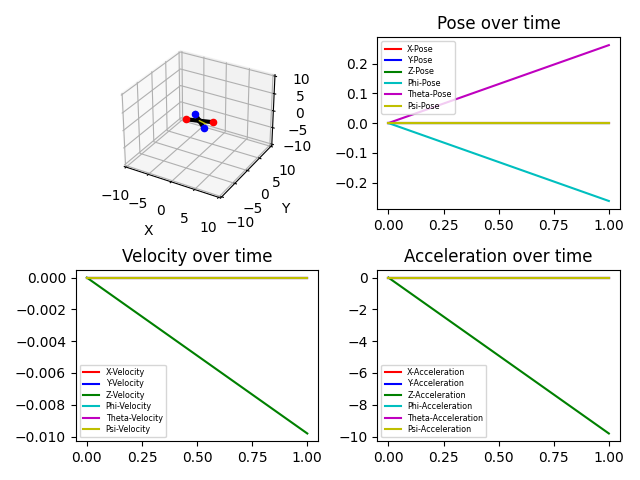

In [114]:
kp = 1.02
ki = 0.0
kd = 2.02
rofous = Aerial_Device(np.array([[2,2,0],[2,-2,0],[-2,-2,0],[-2,2,0]]),
                   np.array([[0.0,0.0,3*np.pi/4],[0.0,0.0,np.pi/4],[0.0,0.0,-np.pi/4],[0.0,0.0,-3*np.pi/4]]),
                   np.array([-1, 1, -1, 1]), 150, 5, -0.05, 0.9)
mControls = [PID(kp,ki,kd), PID(kp,ki,kd)]#[PID(kp, ki, kd),PID(kp, ki, kd),PID(kp, ki, kd),PID(kp, ki, kd)]
throttles = np.zeros(rofous.nMotors)
artist = Renderer(rofous)
rofous.reset()
rofous.refActual = np.array([-np.pi/12,np.pi/12,0.0])
dE = [0.0,0.0,0.0,0.0]

for i in range(1):
    rofous.update_odometry(t=0.001)
    rofous.poseActual = np.array([0.0,0.0,0.0])
    #for i in range(rofous.nMotors):
    motor_pose0 = rofous.autobots[1].transform(np.array([0.0,0.0,0.0]), inverse=True)
    motor_pose1 = rofous.autobots[2].transform(np.array([0.0,0.0,0.0]), inverse=True)
    
    throttles[0] = mControls[0].converge(rofous.poseActual[2] - motor_pose0[2])
    throttles[1] = mControls[1].converge(rofous.poseActual[2] - motor_pose1[2])
    throttles[2] = -mControls[0].converge(rofous.poseActual[2] - motor_pose0[2])
    throttles[3] = -mControls[1].converge(rofous.poseActual[2] - motor_pose1[2])
    rofous.adjust_throttle(throttles)
    
    if np.abs(np.sum(rofous.path['Pose'][-5:])) < 1e-3:
        break
        
print(f'Pose:\n\t{rofous.poseActual}\n\t{rofous.refActual}')
print(f'Throttle:\n\t{rofous.throttleActual}')
artist.render()

Pose:
	[0.00169207 0.00161671 0.00448081]
	[-0.23350285  0.21693198 -0.02475071]
Throttle:
	[100.           0.           0.           3.37136809]


<IPython.core.display.Javascript object>


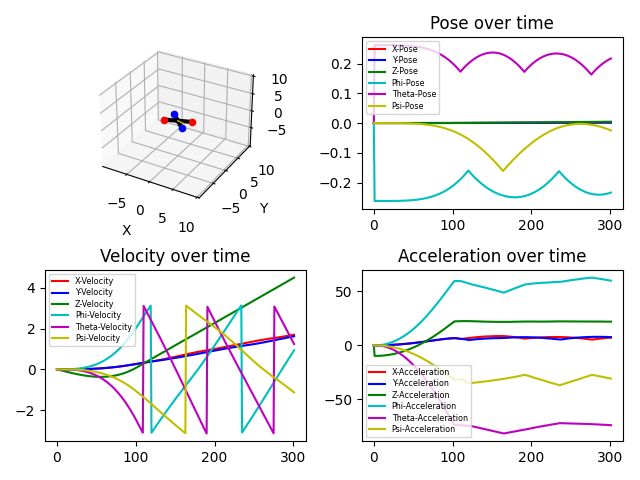

In [117]:
for i in range(100):
    rofous.poseActual = np.array([0.0,0.0,0.0])
    rofous.update_odometry(t=0.001)
    #for i in range(rofous.nMotors):
    
    motor_pose0 = rofous.autobots[1].transform(np.array([0.0,0.0,0.0]), inverse=True)
    motor_pose1 = rofous.autobots[2].transform(np.array([0.0,0.0,0.0]), inverse=True)
    throttles[0] = mControls[0].converge(rofous.poseActual[2] - motor_pose0[2])
    throttles[1] = mControls[1].converge(rofous.poseActual[2] - motor_pose1[2])
    throttles[2] = -mControls[0].converge(rofous.poseActual[2] - motor_pose0[2])
    throttles[3] = -mControls[1].converge(rofous.poseActual[2] - motor_pose1[2])
    rofous.adjust_throttle(throttles)
    if np.abs(np.sum(rofous.path['Pose'][-5:])) < 1e-5:
        break
        
print(f'Pose:\n\t{rofous.poseActual}\n\t{rofous.refActual}')
print(f'Throttle:\n\t{rofous.throttleActual}')
artist.render()

# Altitude Control

In [14]:
kp = 1.2
ki = 0.0
kd = 2
rofous = Aerial_Device(np.array([[2,2,0],[2,-2,0],[-2,-2,0],[-2,2,0]]),
                   np.array([[0.0,0.0,3*np.pi/4],[0.0,0.0,np.pi/4],[0.0,0.0,-np.pi/4],[0.0,0.0,-3*np.pi/4]]),
                   np.array([-1, 1, -1, 1]), 150, 5, -0.05)
pid = PID(kp, ki, kd)
throttles = np.zeros(rofous.nMotors)
artist = Renderer(rofous)
rofous.reset()
target = 10

for i in range(500):
    rofous.update_odometry()
    throttles = [pid.converge(target - rofous.poseActual[2])] * rofous.nMotors
    rofous.adjust_throttle(throttles)
    if np.abs(np.sum(rofous.path['Pose'][-5:])) < 1e-3:
        break
        
print(f'Pose:\n\t{rofous.poseActual}\n\t{rofous.refActual}')
print(f'Throttle:\n\t{rofous.throttleActual}')
artist.render()

TypeError: __init__() missing 1 required positional argument: 'vel_decay'